### Simple Linear Regression: OLS - Sklear Linear Regression if SGDR then Gradient Descent

Simple Linear Regression models the relationship between two variables using a straight line.

**Slope ($m$):** The rate of change of $y$ with respect to $x$.

**Y-Intercept ($b$):** The value of $y$ when $x = 0$.

#### Formula

$$
y = m x + b
$$

- The **slope** shows how much $y$ changes for every unit increase in $x$ i.e. proportationality.
- The **y-intercept** is where the line crosses the y-axis offset , experience with 0 cannot have 0 LPA.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/cgpa-vs-package-in-lpa/placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


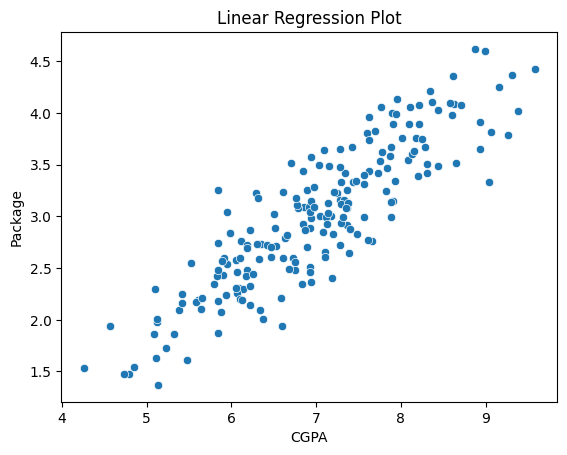

In [4]:
sns.scatterplot(df,x='cgpa',y='package')
plt.title('Linear Regression Plot')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [5]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1:]

In [6]:
x_train , x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
x_train.shape ,x_test.shape ,y_train.shape ,y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

In [8]:
LR = LinearRegression()

In [9]:
LR.fit(x_train,y_train)

LinearRegression()

In [10]:
LR.predict(x_test.iloc[0].values.reshape(1,1))

array([[3.89111601]])

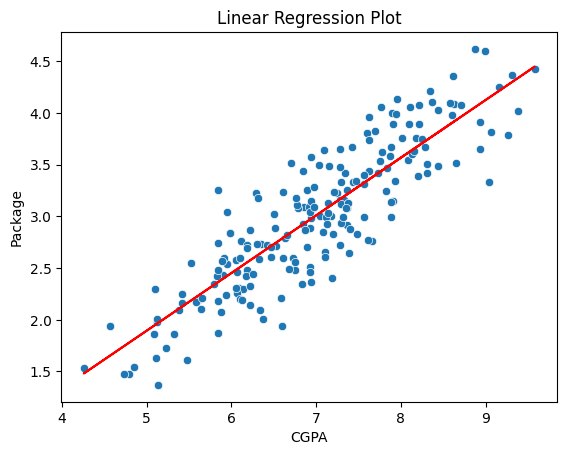

In [11]:
sns.scatterplot(df,x='cgpa',y='package')
plt.plot(x_train,LR.predict(x_train),color='red')
plt.title('Linear Regression Plot')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.show()

In [12]:
print(f"Coeeficient of the best fit line is {LR.coef_} and y-intercept is {LR.intercept_}")

Coeeficient of the best fit line is [[0.55795197]] and y-intercept is [-0.89611192]


### Derivation of Slope ($m$) and Y-Intercept ($b$) in Simple Linear Regression

In Simple Linear Regression using the Ordinary Least Squares (OLS) method, the parameters **slope ($m$)** and **y-intercept ($b$)** are calculated from the data points $(x_i, y_i)$ as follows:

#### 1. Slope ($m$)

$$
m = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

- $x_i$, $y_i$ : Individual data points
- $\bar{x}$ : Mean of $x$
- $\bar{y}$ : Mean of $y$

#### 2. Y-Intercept ($b$)

$$
b = \bar{y} - m\bar{x}
$$

where:
- $m$: Slope (from above)
- $\bar{x}$: Mean of $x$
- $\bar{y}$: Mean of $y$

---

**Summary Table:**

| Parameter    | Formula                                                                            |
|--------------|------------------------------------------------------------------------------------|
| Slope ($m$)  | $\displaystyle m = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$ |
| Y-Intercept ($b$) | $b = \bar{y} - m\bar{x}$                                                          |

These formulas find the best-fit line $y = m x + b$ that minimizes the squared differences between actual and predicted $y$ values.


# Therefore we will try to derive our own Simple Linear Regression

In [13]:
class za_slr:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        try:
            num = 0
            den = 0
            X_train = X_train.values
            y_train = y_train.values
            for i in range(X_train.shape[0]):
                num += (X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
                den += (X_train[i]-X_train.mean())**2
                self.m = num/den
                self.b = (y_train.mean()) - (self.m * X_train.mean())
                
        except Exception as e:
            print(e)
                
    def predict(self,X_test):
        try:
            return self.m * X_test + self.b
        except Exception as e:
            raise ValueError
    def get_param(self):
        print(f"The coefficient of slope is {self.m} & y-intercept is {self.b}")

In [14]:
self_lr = za_slr()

In [15]:
self_lr.fit(x_train,y_train)

In [16]:
self_lr.predict(x_test.iloc[0].values.reshape(1,1))

array([[3.89111601]])

In [17]:
self_lr.get_param()

The coefficient of slope is [0.55795197] & y-intercept is [-0.89611192]
